# 引言

`dict`类型不仅广泛地应用于我们的程序，而且是Pthon实现的基础。类和实例的属性、模型命名空间和函数的关键词参数都是通过字典表示的。

正是因为字典这种重要的角色，Python字典是高度优化的。而哈希表(Hash talbes)是高性能的字典里面的引擎。

其他基于哈希表的内建类型是`set`和`frozenset`。

# 新内容简介
与第一版相比，本章的新内容为：

* 从哈希表在`set`中的使用开始解释它。
* 在字典中保持键插入顺序(python3.6)的内存优化和字典保持实例属性的键共享布局——Python3.3中的`__dict__`。
* `dict.keys`,`dict.items`,`dict.values`返回的视图对象(Python3.0)

# Mapping类型的标准API

`collections.abc`模块提供了`Mapping`和`MutableMappings`抽象基类来描述字典和类似类型的接口。

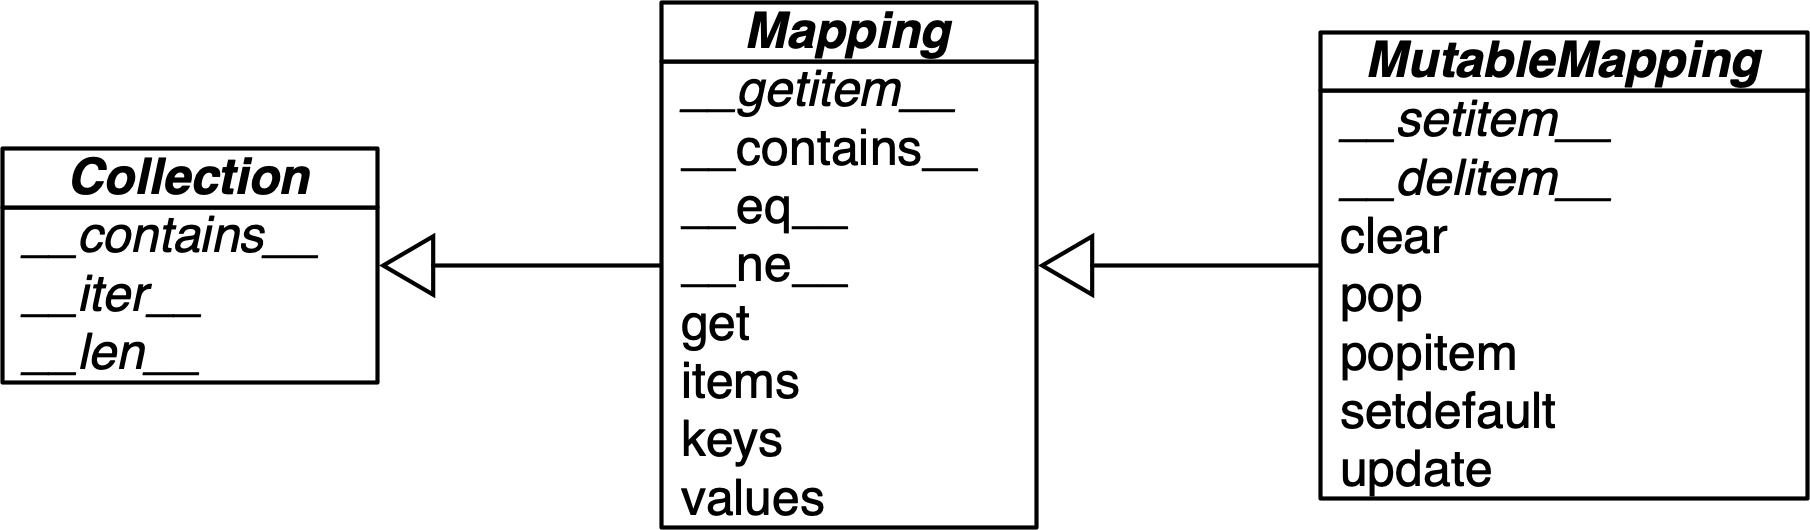

这些抽象基类的主要价值是记录和形式化映射的标准接口，并作为代码中 `isinstance`需要支持是否为映射的测试要求:

In [17]:
from collections import abc
from pprint import pprint

my_dict = {}
print(isinstance(my_dict, abc.Mapping)) # True
print(isinstance(my_dict, abc.MutableMapping)) # True

True
True


如果想要实现自定义映射，比较容易的方式是继承`collections.UserDict`类，或通过组合模式封装一个`dict`，而不是去继承这些抽象基类。标准库中的`collections.UserDict`类和所有具体的映射类都封装了基本的字典，都是基于哈希表实现的。因此，它们都需要键是`hashable`(可哈希的)。

>可哈希的是什么意思？
>
>一个对象是可哈希的如果它有一个整个生命周期内都不会改变的哈希值，这需要实现`__hash__()`方法；还需要能和其他对象比较，要实现`__eq__()`方法。当可哈>希的对象相等时必须有相同的哈希值。

基于这些规则，你可以通过多种方式构建字典。

In [5]:
a = dict(one=1, two=2, three=3)
b = {'three': 3, 'two': 2, 'one': 1}
c = dict([('two', 2), ('one', 1), ('three', 3)])
d = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
e = dict({'three': 3, 'one': 1, 'two': 2})

a == b == c == d == e

True

所有上面字典的实例都是相等的，因为它们有相同的键值对，这里键值对的顺序无关。

Python3.6开始支持保存键的插入顺序，并作为一个Python3.7的特性。所以我们可以依赖这一点：

In [6]:
a

{'one': 1, 'two': 2, 'three': 3}

In [7]:
list(a.keys())

['one', 'two', 'three']

In [8]:
c

{'two': 2, 'one': 1, 'three': 3}

In [9]:
c.popitem()

('three', 3)

In [10]:
c

{'two': 2, 'one': 1}

在Python3.6之前，`c.popitem()`会返回任意的键值对，现在它总是返回最后的键值对。

# 字典推导式

话不多说，举个例子：

In [15]:
# 一个键值对列表
dial_codes = [                                               
    (880, 'Bangladesh'),
    (55,  'Brazil'),
    (86,  'China'),
    (91,  'India'),
    (62,  'Indonesia'),
    (81,  'Japan'),
    (234, 'Nigeria'),
    (92,  'Pakistan'),
    (7,   'Russia'),
    (1,   'United States'),
]

# 利用字典推导式构建字典
# 这里我们把country作为key, code作为value
country_dial = {country: code for code, country in dial_codes} 
country_dial

{'Bangladesh': 880,
 'Brazil': 55,
 'China': 86,
 'India': 91,
 'Indonesia': 62,
 'Japan': 81,
 'Nigeria': 234,
 'Pakistan': 92,
 'Russia': 7,
 'United States': 1}

In [16]:
# 排序、把code作为key,country作为value、过滤
{code: country.upper() 
    for country, code in sorted(country_dial.items())
    if code < 70}

{55: 'BRAZIL', 62: 'INDONESIA', 7: 'RUSSIA', 1: 'UNITED STATES'}

# 通用映射方法概览

下面显示了`dict`和两个有用的变种的方法，`defaultdict`和`OrderedDict`。

|                              | dict | defaultdict | OrderedDict |                                                              |
| :--------------------------- | :--- | :---------- | :---------- | ------------------------------------------------------------ |
| `d.clear()`                  | :o:  | :o:         | :o:         | 移除所有元素                                             |
| `d.__contains__(k)`          | :o:  | :o:         | :o:         | `k in d`                                                     |
| `d.copy()`                   | :o:  | :o:         | :o:         | 浅复制                                                |
| `d.__copy__()`               |      | :o:         |             | 用于支持  `copy.copy`                                      |
| `d.default_factory`          |      | :o:         |             | 被 `__missing__`函数调用，用以给未找到的元素设置值    |
| `d.__delitem__(k)`           | :o:  | :o:         | :o:         | `del d[k]`—移除键为`k`的元素                       |
| `d.fromkeys(it, [initial])`  | :o:  | :o:         | :o:         | 将迭代器 `it` 里的元素设置为映射里的键，如果有 `initial` 参数，就把它作为这键对应的值（默认是 `None`） |
| `d.get(k, [default])`        | :o:  | :o:         | :o:         | 返回`k`对应的值, 返货 `default` 或 `None` 如果不存在`k` |
| `d.__getitem__(k)`           | :o:  | :o:         | :o:         | 让字典能用`d[k]`的形式返回`k`对应的值                                 |
| `d.items()`                  | :o:  | :o:         | :o:         | 返回`d`里所有键值对—`(key, value)` 对                   |
| `d.__iter__()`               | :o:  | :o:         | :o:         | 获取键的迭代器                                      |
| `d.keys()`                   | :o:  | :o:         | :o:         | 获取所有的键                                        |
| `d.__len__()`                | :o:  | :o:         | :o:         | `len(d)`                                    |
| `d.__missing__(k)`           |      | :o:         |             | 当 `__getitem__` 找不到`k`时被调用             |
| `d.move_to_end(k, [last])`   |      |             | :o:         | 移动 `k`到最前或最后 (`last` 默认为 `True` ) |
| `d.pop(k, [default])`        | :o:  | :o:         | :o:         | 移除并返回`k`对应的值,或`default`或`None` 如果`k`不存在 |
| `d.popitem()`                | :o:  | :o:         | :o:         | 移除最后插入的键值对—— `(key, value)`  |
| `d.__reversed__()`           | :o:  | :o:         | :o:         | 返回倒序的键迭代器            |
| `d.setdefault(k, [default])` | :o:  | :o:         | :o:         | 如果 `k in d`, 返回 `d[k]`; 否则设置 `d[k] = default`并返回 |
| `d.__setitem__(k, v)`        | :o:  | :o:         | :o:         | `d[k] = v`                                    |
| `d.update(m, [**kwargs])`    | :o:  | :o:         | :o:         | 从映射或可迭代的`(key, value)`对中更新 `d`  |
| `d.values()`                 | :o:  | :o:         | :o:         | 返回字典里的所有制                                    |


当字典`d`执行`d.update(m)`时，Python会把参数`m`当成鸭子类型(duck type)：首先会检查`m`是否有`keys`方法，若有，假设它为一个映射。
否则，假设`m`是`(key,value)`键值对。

一个好用的映射方法是`setdefault()`，当字典元素的值可变时，它避免了冗余的键查找，并且可以原地修改它。

## 用setdefault方法处理缺失键

在Python的快速失败哲学里，字典访问`d[k]`会抛出异常当`k`不存在时。每个Python人都知道`d.get(k,default)`是`d[k]`的一种替代方法，当`k`不存在时，不是报错，而是返回默认值`default`。然而，当我们想不存在即更新时，无论是`d[k]`还是`get`都不方便。

这段程序从索引中获取单词出现的频率信息，并把它们写进对应的列表里。


`index0.py`:
```py
import re
import sys

WORD_RE = re.compile(r'\w+')

index = {}
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            # 这是一种不好的实现，这样写只是为了证明论点
            occurrences = index.get(word, [])  # ①读取word出现的列表，没有则返回空列表
            occurrences.append(location)       # ②把单词新出现的位置添加到列表的后面
            index[word] = occurrences          # ③把新的列表放回字典中，又涉及到一次查询操作

# 以字母顺序打印结果
for word in sorted(index, key=str.upper):  # 用sorted 函数的 key= 参数没有调用 str.uppper，而是把这个方法的引用传递给 sorted 函数，这样在排序的时候，单词会被规范成统一格式。
    print(word, index[word])
```


`zen.txt`:
```
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
```

以上面这个文件作为参数调用。

```sh
(py38) $ python index0.py zen.txt
a [(19, 48), (20, 53)]
Although [(11, 1), (16, 1), (18, 1)]
ambiguity [(14, 16)]
and [(15, 23)]
are [(21, 12)]
aren [(10, 15)]
at [(16, 38)]
bad [(19, 50)]
be [(15, 14), (16, 27), (20, 50)]
beats [(11, 23)]
Beautiful [(3, 1)]
better [(3, 14), (4, 13), (5, 11), (6, 12), (7, 9), (8, 11), (17, 8), (18, 25)]
break [(10, 40)]
by [(1, 20)]
cases [(10, 9)]
complex [(5, 23)]
Complex [(6, 1)]
complicated [(6, 24)]
counts [(9, 13)]
dense [(8, 23)]
do [(15, 64), (21, 48)]
Dutch [(16, 61)]
easy [(20, 26)]
enough [(10, 30)]
Errors [(12, 1)]
explain [(19, 34), (20, 34)]
Explicit [(4, 1)]
explicitly [(13, 8)]
face [(14, 8)]
first [(16, 41)]
Flat [(7, 1)]
good [(20, 55)]
great [(21, 28)]
guess [(14, 52)]
hard [(19, 26)]
honking [(21, 20)]
idea [(19, 54), (20, 60), (21, 34)]
If [(19, 1), (20, 1)]
implementation [(19, 8), (20, 8)]
implicit [(4, 25)]
In [(14, 1)]
is [(3, 11), (4, 10), (5, 8), (6, 9), (7, 6), (8, 8), (17, 5), (18, 16), (19, 23), (20, 23)]
it [(15, 67), (19, 43), (20, 43)]
let [(21, 42)]
may [(16, 19), (20, 46)]
more [(21, 51)]
Namespaces [(21, 1)]
nested [(7, 21)]
never [(12, 15), (17, 20), (18, 10)]
not [(16, 23)]
Now [(17, 1)]
now [(18, 45)]
obvious [(15, 49), (16, 30)]
of [(1, 9), (14, 13), (21, 56)]
often [(18, 19)]
one [(15, 17), (15, 43), (21, 16)]
only [(15, 38)]
pass [(12, 21)]
Peters [(1, 27)]
practicality [(11, 10)]
preferably [(15, 27)]
purity [(11, 29)]
Python [(1, 12)]
re [(16, 58)]
Readability [(9, 1)]
refuse [(14, 27)]
right [(18, 38)]
rules [(10, 50)]
s [(19, 46), (21, 46)]
should [(12, 8), (15, 7)]
silenced [(13, 19)]
silently [(12, 26)]
Simple [(5, 1)]
Sparse [(8, 1)]
Special [(10, 1)]
special [(10, 22)]
t [(10, 20)]
temptation [(14, 38)]
than [(3, 21), (4, 20), (5, 18), (6, 19), (7, 16), (8, 18), (17, 15), (18, 32)]
that [(16, 10)]
The [(1, 1)]
the [(10, 46), (14, 4), (14, 34), (19, 4), (20, 4)]
There [(15, 1)]
those [(21, 59)]
Tim [(1, 23)]
to [(10, 37), (14, 49), (15, 61), (19, 31), (20, 31)]
ugly [(3, 26)]
Unless [(13, 1)]
unless [(16, 47)]
way [(15, 57), (16, 15)]
you [(16, 54)]
Zen [(1, 5)]
```

`index0.py`中的①-③那三行可以用`dict.setdfault`一行来代替。如下所示：

`index.py`:
```py
import re
import sys

WORD_RE = re.compile(r'\w+')

index = {}
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            index.setdefault(word, []).append(location)  # 获取单词的出现情况列表，如果单词不存在，把单词和一个空列表放进映射，然后返回这个空列表，这样就能在不进行第二次查找的情况下更新列表了。

for word in sorted(index, key=str.upper):
    print(word, index[word])
```

总之，下面这行代码的结果：
```py
my_dict.setdefault(key, []).append(new_value)
```
和三行代码的结果是一样的：
```py
if key not in my_dict:
    my_dict[key] = []
my_dict[key].append(new_value)
```

不过后者至少要进行两次键查询——如果键不存在的话，就是三次，用 `setdefault` 只需要一次查询就可以完成整个操作。

# 映射的弹性键查询

有时候为了方便起见，就算某个键在映射里不存在，我们也希望在通过这个键读取值的时候能得到一个默认值。有两个途径能帮我们达到这个
目的，一个是通过 `defaultdict` 这个类型而不是普通的 `dict`，另一个是继承`dict`或任意映射类型，然后在子类中实现 `__missing__` 方法。下面将介绍这两种方法。

## defaultdict: 处理缺失键的另一种选择


`index_default.py`:
```py
import collections
import re
import sys

WORD_RE = re.compile(r'\w+')

index = collections.defaultdict(list)     # 创建一个defaultdict实例，以list构造函数作为default_factory
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            index[word].append(location)  # 如果 index 并没有 word 的记录，那么 default_factory 会被调用，为查询不到的键创造一个值。这个值在这里是一个空的列表，然后
                                          # 这个空列表被赋值给 index[word]，继而被当作返回值返回，因此.append(location) 操作总能成功。

for word in sorted(index, key=str.upper):
    print(word, index[word])
```

当实例化一个`defaultdict`时,需要给构造方法提供一个可调用对象，这个可调用对象会在 `__getitem__`碰到找不到的键的时候被调用，让 `__getitem__` 返回某种默认值。

像上面那样，新建一个这样的字典：`dd = defaultdict(list)`，如果键`new-key` 在 `dd` 中还不存在的话，表达式 `dd['new-key']` 会执行以下的步骤：
1. 调用 `list()` 来建立一个新列表。
2. 把这个新列表作为值，`new-key` 作为它的键，放到 `dd` 中。
3. 返回这个列表的引用。

而这个用来生成默认值的可调用对象存放在名为 `default_factory` 的实例属性里。如果没有`default_factory`被提供，那么会报`KeyError`。

> `defaultdict`中的`defalut_factory`只会为`__getitem__`提供默认值。比如，如果`dd`是`defaultdict`，`k`是一个不存在的键，`dd[k]`会调用`default_factory`去创建默认值，而`dd.get(k)`仍然返回`None`。

所有这一切背后的功臣其实是特殊方法 `__missing__`。它会在`defaultdict` 遇到找不到的键的时候调用 `default_factory`，而实际上这个特性是所有映射类型都可以选择去支持的。

## __missing__方法

所有的映射类型在处理找不到的键的时候，都会牵扯到 `__missing__`方法。这也是这个方法称作“missing”的原因。虽然基类 `dict` 并没有定义这个方法，但是 `dict` 是知道有这么个东西存在的。也就是说，如果有一个类继承了 `dict`，然后这个继承类提供了 `__missing__` 方法，那么在 `__getitem__` 碰到找不到的键的时候，Python 就会自动调用它，而不是抛出一个 `KeyError` 异常。

> `__missing__`方法只会被`__getitem__`调用。

有时候，你会希望在查询的时候，映射类型里的键统统转换成 `str`。

`strkeydict0.py`:
```py
class StrKeyDict0(dict):  # 继承dict

    def __missing__(self, key):
        if isinstance(key, str):  # 如果缺失键本身就是str，则抛出KeyError异常
            raise KeyError(key)
        return self[str(key)]  # 否则转换为str再查找

    def get(self, key, default=None):
        try:
            return self[key]  # self[key]把查找委托给__getitem__，这样在宣布查找失败之前，还能通过__missing__再给某个键一个机会
        except KeyError:
            return default  # 如果抛出KeyError，那么说明__missing__也失败了，于是返回默认值

    def __contains__(self, key):
        return key in self.keys() or str(key) in self.keys()  # 先按照传入键的原本值查找，如果没找到，再用str()方法把键转换成str再查找一次
```

当搜索非字符串键时，如果键不存在，`StrKeyDict0`将它转换为`str`：

In [10]:
from strkeydict0 import StrKeyDict0

d = StrKeyDict0([('2', 'two'), ('4', 'four')])


In [9]:
# 测试d[key]
d['2']

'two'

In [4]:
d[4]

'four'

In [5]:
d[1]

KeyError: '1'

In [11]:
# 测试d.get(key)
d.get('2')

'two'

In [7]:
d.get(4)

'four'

In [8]:
d.get(1,'N/A')

'N/A'

In [12]:
# 测试 in
2 in d

True

In [13]:
1 in d

False

花点时间考虑为什么在`__missing__`实现中需要测试`isinstance(key,str)`。

没有该测试，我们的`__missing__`方法对于任何键`k`,str或不是str。每当`str(k)`产生现有键时，可以正常工作。 但是，如果`str(k)`不是现有的键，我们会有无限的递归。 
最后一行，`self[str(key)]`会调用`__getitem__`传递该str键，反过来会再次调用`__missing__`。

`__contains__`方法也是必须的，为了保持一致。这是因为` k in d` 这个操作会调用它，但是我们从 `dict` 继承到的 `__contains__`方法不会在找不到键的时候调用 `__missing__` 方法。`__contains__`里还有个细节，就是我们这里没有用更具 Python 风格的方式——`k in my_dict`——来检查键是否存在，因为那也会导致`__contains__` 被递归调用。为了避免这一情况，这里采取了更显式的方法，直接在这个`self.keys()` 里查询。

# dict的变体

* `collections.OrderedDict`
    * 这个类型在添加键的时候会保持顺序，因此键的迭代次序总是一致的。`OrderedDict` 的 `popitem` 方法默认删除并返回的是字典里的最后一个元素，但是如果像 `my_odict.popitem(last=False)` 这样调用它，那么它删除并返回第一个被添加进去的元素。自从Python3.6之后，内建的`dict`也有这个特性，因此使用这个类只是为了向前兼容。
* `collections.ChainMap`
    * 该类型可以容纳的映射对象列表，然后在进行键查找操作的时候，这些对象会被当作一个整体被逐个查找，直到键被找到为止。这个功能在给有嵌套作用域的语言做解释器的时候很有用，可以用一个映射对象来代表一个作用域的上下文。

* `collections.Counter`
    * 这个映射类型会给键准备一个整数计数器。每次更新一个键的时候都会增加这个计数器。所以这个类型可以用来给可散列表对象计数，或者是当成多重集来用——多重集合就是集合里的元素可以出现不止一次。`Counter` 实现了 `+` 和 `-` 运算符用来合并记录，还有像`most_common([n])` 这类很有用的方法`most_common([n])` 会按照次序返回映射里最常见的 `n` 个键和它们的计数。

In [22]:
import collections

ct = collections.Counter('abracadabra')
ct

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})

In [23]:
ct.update('aaaaazzz')
ct

Counter({'a': 10, 'b': 2, 'r': 2, 'c': 1, 'd': 1, 'z': 3})

In [24]:
ct.most_common(3)

[('a', 10), ('z', 3), ('b', 2)]

# 构建自定义映射

下面这些映射类型不是用来直接实例化的，而是给我们继承的，以创建自定义映射类型。

* `collections.UserDict`  : 一个纯Python的实现，看起啦像标准的`dict`。
* `collections.TypedDict` : 这允许你使用类型提示来定义映射类型，以指定每个键的预期值类型。

`collections.UserDict` 类的行为类似于 `dict`，但是它更慢，因为它是在 Python 中实现的，而不是在 C 中。

## 继承UserDict

通常通过继承`UserDict`而不是`dict`来创建一个新的映射类型，因为这更简单。这体现正在，我们能够改进上面定义的 `StrKeyDict0` 类，使得所有的键都存储为字符串类型。

主要的原因是，内建的`dict`的某些方法在实现时走了一些捷径，而我们继承它时，不得不实现这些方法。但`UserDict`就不会存在这些问题。

另外一个值得注意的是，`UserDict` 并不是 `dict` 的子类，而是利用组合：它有一个叫作 `data` 的属性，是 `dict` 的实例，这个属性实际上是 `UserDict` 最终存储数据的地方。这样做的好处是，比起示例`strkeydict0.py`中`UserDict` 的子类就能在实现 `__setitem__` 的时候避免不必要的递归，也可以让 `__contains__` 里的代码更简洁。

多亏了 `UserDict`，下面`StrKeyDict` 的代码比`StrKeyDict0` 要短一些，功能却更完善：它不但把所有的键都以字符串的形式存储，还能处理一些创建或者更新实例时包含非字符串类型的键这类意外情况。


In [27]:
import collections


class StrKeyDict(collections.UserDict):  # 继承UserDict

    def __missing__(self, key):  # 和StrKeyDict0相同
        if isinstance(key, str):
            raise KeyError(key)
        return self[str(key)]

    def __contains__(self, key):
        return str(key) in self.data  #  __contains__ 则更简洁些。这里可以放心假设所有已经存储的键都是字符串。
                                      # 因此，只要在 self.data 上查询就好了，并不需要像StrKeyDict0 那样去麻烦 self.keys()。

    def __setitem__(self, key, item):
        self.data[str(key)] = item    # __setitem__ 会把所有的键都转换成字符串。由于把具体的实现委
                                      # 托给了 self.data 属性，这个方法写起来也不难。

因为 `UserDict` 继承的是 `MutableMapping`，所以 `StrKeyDict` 里剩下的那些映射类型的方法都是从 `UserDict`、`MutableMapping` 和`Mapping `这些超类继承而来的。
特别是最后的 `Mapping` 类，它虽然是一个抽象基类(ABC)，但它却提供了好几个实用的方法。以下两个方法值得关注。

* `MutableMapping.update`
    * 这个方法不但可以为我们所直接利用，它还用在 `__init__` 里，让构造方法可以利用传入的各种参数（其他映射类型、元素是 `(key,value)` 对的可迭代对象和键值参数）来新建实例。因为这个方法在背后是用 `self[key] = value` 来添加新值的，所以它其实是在使用我们的 `__setitem__` 方法。

* `Mapping.get`
    * 在 `StrKeyDict0`中，我们不得不改写 `get` 方法，好让它的表现跟 `__getitem__` 一致。而在`StrKeyDict`中就没这个必要了，因为它继承了 `Mapping.get` 方法，而 Python 的源码中，这个方法的实现方式跟`StrKeyDict0.get`是一模一样的。
    
# 不可变映射

有时你需要不可变的映射类型。从 Python 3.3 开始，`types` 模块中引入了一个封装类名叫`MappingProxyType`。
如果给这个类一个映射，它会返回一个只读的动态代理`mappingproxy`。这意味着如果对原映射做出了改动，我们通过这个`mappingproxy`可以观察到，但是无法通过它对原映射做出修改

In [28]:
from types import MappingProxyType

d = {1: 'A'}
d_proxy = MappingProxyType(d)
d_proxy

mappingproxy({1: 'A'})

In [29]:
d_proxy[1] # 可以读取

'A'

In [30]:
d_proxy[2] = 'x' # 不能修改

TypeError: 'mappingproxy' object does not support item assignment

In [31]:
d[2] = 'B'
d_proxy 

mappingproxy({1: 'A', 2: 'B'})

In [32]:
d_proxy[2] # 可以看到原映射的改动

'B'

# 字典视图

字典实例方法`.keys()`,`.values()`,`.items()`相应地返回了`dict_keys`,`dict_values`,`dict_items`的类实例。这些字典视图字典内部数据结构的只读投影。
它们避免了等效的 Python 2方法的内存开销，这些方法返回的列表复制了目标 `dict` 中已有的数据，它们还替换了返回迭代器的旧方法。

In [34]:
d = dict(a=10, b=20, c=30)
values = d.values()
values

dict_values([10, 20, 30])

In [35]:
len(values)

3

In [36]:
list(values)

[10, 20, 30]

In [37]:
reversed(values) #视图实现了__reversed__， 返回一个自定义的迭代器

In [39]:
values[0] # 我们不能用[]从视图中获取单个值

TypeError: 'dict_values' object is not subscriptable

如果源字典更新了，你能马上观察到现存视图内容的更新。

In [40]:
d['z'] = 99
d

{'a': 10, 'b': 20, 'c': 30, 'z': 99}

In [41]:
values

dict_values([10, 20, 30, 99])

类`dict_key`、`dict_values`和`dict_items`是内部的：它们不能通过内建或任何标准模块获取，甚至如果你获取到它们的一个引用，也无法用来创建新的视图。

In [45]:
values_class = type({}.values())
v = values_class()

TypeError: cannot create 'dict_values' instances

# 集合论

集合并不是Python中的新事物，但仍然是未充分利用的。`set` 和它的不可变类型 `frozenset` 直到 Python 2.3 才首次以模块的形式出现，然后在 Python 2.6 中它们升级成为内置类型。

集合本质是许多唯一对象的聚集。大家都知道可以用来去重：

In [46]:
l = ['spam', 'spam', 'eggs', 'spam', 'bacon', 'eggs']
set(l)

{'bacon', 'eggs', 'spam'}

In [47]:
list(set(l))

['eggs', 'spam', 'bacon']

集合中的元素必须是可哈希的，`set` 类型本身是不可哈希的，所以你不能创建一个元素是`set`的`set`。
但是`frozenset`是可哈希的，所以可以创建一个包含不同 `frozenset` 的 `set`。

除了保证唯一性，集合还实现了很多基础的中缀运算符。

给定两个集合`a` 和`b`，`a | b` 返回的是它们的合集，`a & b` 得到的是交集，而 `a - b`得到的是差集。

例如，我们有一个电子邮件地址的集合（`haystack`），还要维护一个较小的电子邮件地址集合（`needles`），然后求出 `needles` 中有多少地
址同时也出现在了 `heystack` 里。借助集合操作，我们只需要一行代码就可以了。
```py
found = len(needles & haystack)
```
这种方式很快，但是需要它们都是集合。如果不是集合，你也可以很快地构造。
```py
found = len(set(needles) & set(haystack))
# 或
found = len(set(needles).intersection(haystack))
```

除了极快的成员检测(基于哈希表实现的)，内建的集合类型还提供了丰富的API来创建或修改集合。

## 集合字面量

除空集之外，集合的字面量——`{1}、{1, 2}`，等等——看起来跟它的数学形式一模一样。如果是空集，那么必须写成 `set()` 的形式。

> 如果写`{}`，创建的是空字典，而不是空集合。


In [48]:
s = {1}
type(s)

set

In [49]:
s

{1}

In [50]:
s.pop()

1

In [51]:
s

set()

集合字面量像`{1,2,3}`不仅比调用构造函数的形式(如`set([1,2,3])`)更可读，而且速度更快。

没有特殊的语法来表示`frozenset`的字面量，因此，只能通过构造函数构建。

In [53]:
frozenset(range(10))

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

## 结合推导式

In [56]:
from unicodedata import name 
{chr(i) for i in range(32, 256) if 'SIGN' in name(chr(i),'')} # 把编码在 32~255 之间的字符的名字里有“SIGN”单词的挑出来，放到一个集合里。

{'#',
 '$',
 '%',
 '+',
 '<',
 '=',
 '>',
 '¢',
 '£',
 '¤',
 '¥',
 '§',
 '©',
 '¬',
 '®',
 '°',
 '±',
 'µ',
 '¶',
 '×',
 '÷'}

## 集合操作

下图列出了可变和不可变集合所拥有的方法的概况，其中不少是运算符重载的特殊方法。

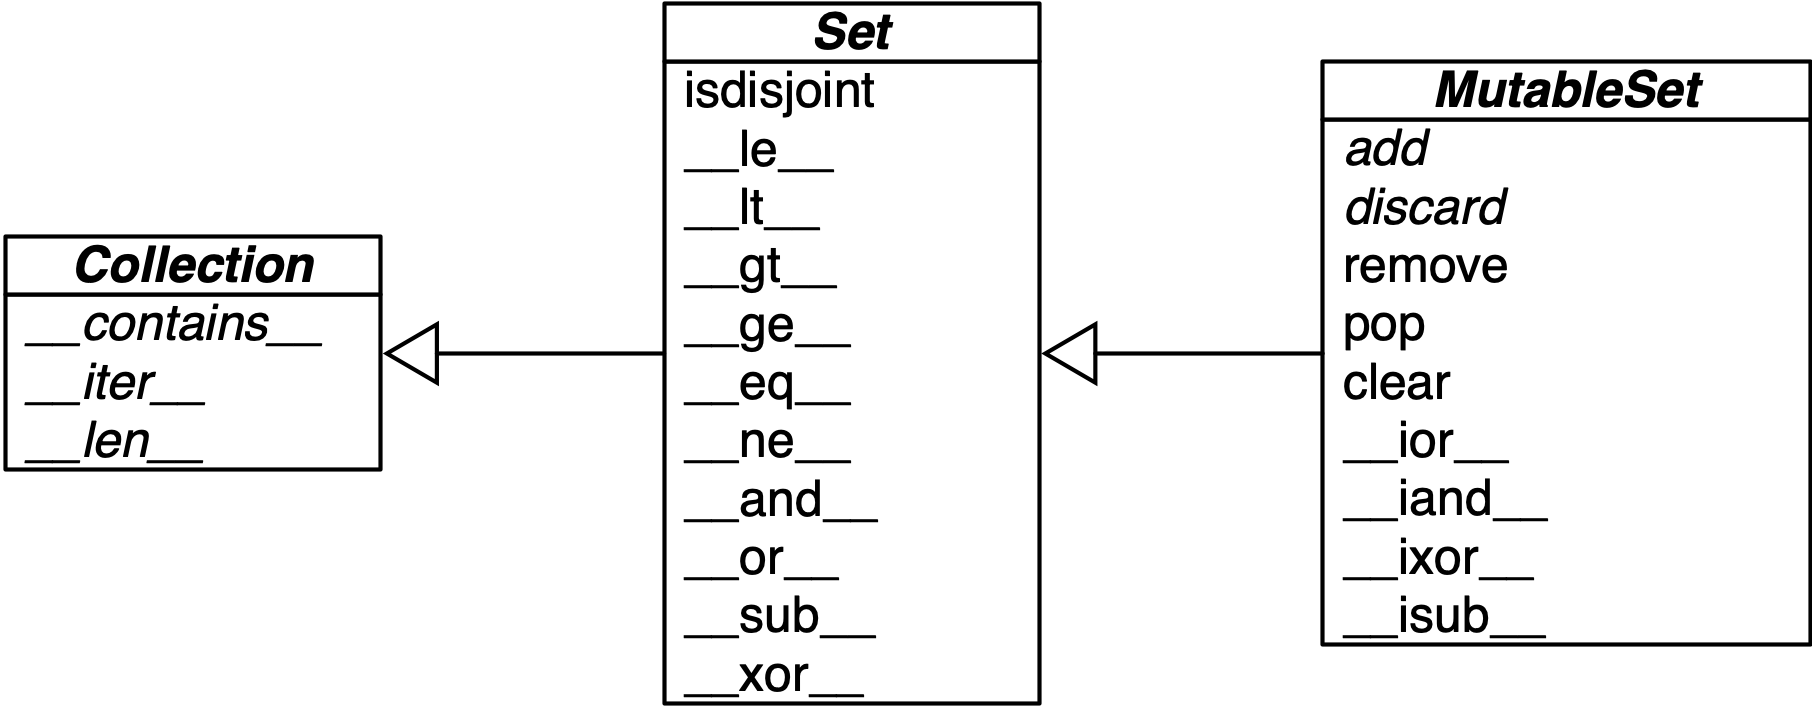




下表则包含了数学里集合的各种操作在 Python 中所对应的运算符和方法。

| Math symbol | Python operator | Method                                 | Description                                                  |
| :---------- | :-------------- | :------------------------------------- | :----------------------------------------------------------- |
| S ∩ Z       | `s & z`         | `s.__and__(z)`                         | `s` 和 `z`的交集                                             |
|             | `z & s`         | `s.__rand__(z)`                        | 反向与(`&`)操作                                              |
|             |                 | `s.intersection(it, …)`                | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们与 `s` 的交集 |
|             | `s &= z`        | `s.__iand__(z)`                        | 把 `s` 更新为 `s` 和 `z` 的交集                              |
|             |                 | `s.intersection_update(it, …)`         | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求得它们与 `s` 的交集，然后把 `s` 更新成这 个交集 |
|             |                 |                                        |                                                              |
| S ∪ Z       | `s | z`         | `s.__or__(z)`                          | `s` 和 `z的`并集                                             |
|             | `z | s`         | `s.__ror__(z)`                         | `|`的反向操作                                                |
|             |                 | `s.union(it, …)`                       | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的并集 |
|             | `s |= z`        | `s.__ior__(z)`                         | 把 `s` 更新为 `s` 和 `z` 的并集                              |
|             |                 | `s.update(it, …)`                      | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的并集，并把 `s` 更新成这个并 集 |
|             |                 |                                        |                                                              |
| S \ Z       | `s - z`         | `s.__sub__(z)`                         | `s` 和 `z` 的差集，或者叫作相对补集                          |
|             | `z - s`         | `s.__rsub__(z)`                        | `-` 的反向操作                                               |
|             |                 | `s.difference(it, …)`                  | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的差集 |
|             | `s -= z`        | `s.__isub__(z)`                        | 把 `s` 更新为它与 `z` 的差集                                 |
|             |                 | `s.difference_update(it, …)`           | 把可迭代的 `it` 和其他所有参数 转化为集合，求它们和 `s` 的差 集，然后把 `s` 更新成这个差集 |
|             |                 | `s.symmetric_difference(it)`           | 求 `s` 和 `set(it)` 的对称差集                               |
|             |                 |                                        |                                                              |
| S ∆ Z       | `s ^ z`         | `s.__xor__(z)`                         | 求 `s` 和 `z` 的对称差集                                     |
|             | `z ^ s`         | `s.__rxor__(z)`                        | `^` 的反向操作                                               |
|             |                 | `s.symmetric_difference_update(it, …)` | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的对称差集，最后把 `s` 更新成 该结果 |
|             | `s ^= z`        | `s.__ixor__(z)`                        | 把 `s` 更新成它与 `z` 的对称差集                             |


集合的比较运算符，返回值是布尔类型:

| Math symbol | Python operator | Method              | Description                                             |
| :---------- | :-------------- | :------------------ | :------------------------------------------------------ |
|             |                 | `s.isdisjoint(z)`   | 查看 `s` 和 `z` 是否不相交（没有共同元 素）             |
|             |                 |                     |                                                         |
| e ∈ S       | `e in s`        | `s.__contains__(e)` | 元素 `e` 是否属于 `s`                                   |
|             |                 |                     |                                                         |
| S ⊆ Z       | `s <= z`        | `s.__le__(z)`       | `s` 是否为 `z` 的子集                                   |
|             |                 | `s.issubset(it)`    | 把可迭代的 `it` 转化为集合，然后查看 `s` 是否为它的子集 |
|             |                 |                     |                                                         |
| S ⊂ Z       | `s < z`         | `s.__lt__(z)`       | `s` 是否为 `z` 的真子集                                 |
|             |                 |                     |                                                         |
| S ⊇ Z       | `s >= z`        | `s.__ge__(z)`       | `s` 是否为 `z` 的父集                                   |
|             |                 | `s.issuperset(it)`  | 把可迭代的 `it` 转化为集合，然后查看 `s` 是否为它的父集 |
|             |                 |                     |                                                         |
| S ⊃ Z       | `s > z`         | `s.__gt__(z)`       | `s` 是否为 `z` 的真父集                                 |

除了跟数学上的集合计算有关的方法和运算符，集合类型还有一些为了实用性而添加的方法:

|                | set  | frozenset |                                                              |
| :------------- | :--- | :-------- | ------------------------------------------------------------ |
| `s.add(e)`     | :o:  |           | 把元素 `e` 添加到 `s` 中                                     |
| `s.clear()`    | :o:  |           | 移除掉 `s` 中的所有元素                                      |
| `s.copy()`     | :o:  | :o:       | 对 `s` 浅复制                                                |
| `s.discard(e)` | :o:  |           | 如果 `s` 里有 `e` 这个元素的话，把它移除                     |
| `s.__iter__()` | :o:  | :o:       | 返回 `s` 的迭代器                                            |
| `s.__len__()`  | :o:  | :o:       | `len(s)`                                                     |
| `s.pop()`      | :o:  |           | 从 `s` 中移除一个元素并返回它的值，若 `s` 为空，则抛 出 `KeyError` 异常 |
| `s.remove(e)`  | :o:  |           | 从 `s` 中移除 `e` 元素，若 `e` 元素不存在，则抛出 `KeyError` 异常 |

到这里，我们差不多把集合类型的特性总结完了。

正如在字典视图中提到的，我们现在来看这两个字典视图类型表现得多像`frozenset`。

## 字典视图上的集合操作

下表显示了集合方法：`.keys()`、`.items()`返回的视图对象与`frozenset`有多相似：

|                              | frozenset | dict_keys             | dict_items | Description                                                  |
| :--------------------------- | :-------- | :-------------------- | :--------- | ------------------------------------------------------------ |
| `s.__and__(z)`               | :o:       | :o:                   | :o:        | `s & z`                                                      |
| `s.__rand__(z)`              | :o:       | :o:                   | :o:        | 反向`&`                                                      |
| `s.__contains__()`           | :o:       | :o:                   | :o:        | `e in s`                                                     |
| `s.copy()`                   | :o:       |                       |            | 对 `s` 浅复制                                                |
| `s.difference(it, …)`        | :o:       |                       |            | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的差集 |
| `s.intersection(it, …)`      | :o:       |                       |            | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们与 `s` 的交集 |
| `s.isdisjoint(z)`            | :o:       | :o:                   | :o:        | 查看 `s` 和 `z` 是否不相交（没有共同元 素）                  |
| `s.issubset(it)`             | :o:       |                       |            | 把可迭代的 `it` 转化为集合，然后查看 `s` 是否为它的子集      |
| `s.issuperset(it)`           | :o:       |                       |            | 把可迭代的 `it` 转化为集合，然后查看 `s` 是否为它的父集      |
| `s.__iter__()`               | :o:       | :o:                   | :o:        | 返回 `s` 的迭代器                                            |
| `s.__len__()`                | :o:       | :o:                   | :o:        | `len(s)`                                                     |
| `s.__or__(z)`                | :o:       | :o:                   | :o:        | `s | z`                                                      |
| `s.__ror__()`                | :o:       | :o:                   | :o:        | `|`的反向操作                                                |
| :o:                          | :o:       | 返回 `s` 的逆序迭代器 |            |                                                              |
| `s.__rsub__(z)`              | :o:       | :o:                   | :o:        | `-` 的反向操作                                               |
| `s.__sub__(z)`               | :o:       | :o:                   | :o:        | `s - z`                                                      |
| `s.symmetric_difference(it)` | :o:       |                       |            | 求 `s` 和 `set(it)` 的对称差集                               |
| `s.union(it, …)`             | :o:       |                       |            | 把可迭代的 `it` 和其他所有参数 转化为集合，然后求它们和 `s` 的并集 |
| `s.__xor__()`                | :o:       | :o:                   | :o:        | 求 `s` 和 `z` 的对称差集                                     |
| `s.__rxor__()`               | :o:       | :o:                   | :o:        | `^` 的反向操作                                               |


特别地，`dict_keys` 和 `dict_items` 实现了支持强大的集合运算符 `&` (交集)、 `|` (并集)、`-`(差集)和 `^` (对称差)的特殊方法。

这意味着，例如，找到出现在两个字典中的键就像这样简单:

In [57]:
d1 = dict(a=1, b=2, c=3, d=4)
d2 = dict(b=20, d=40, e=50)
d1.keys() & d2.keys()

{'b', 'd'}

注意，`&` 的返回值是一个集合。更好的是: 字典视图中的 `set` 操作符与 `set` 实例兼容。看看这个:

In [58]:
s = {'a', 'e', 'i'}
d1.keys() & s

{'a'}

In [59]:
d1.keys() | s

{'a', 'b', 'c', 'd', 'e', 'i'}

现在我们换个话题来讨论如何使用哈希表实现集合和字典。

# dict和set的背后

想要理解 Python 里字典和集合类型的长处和弱点，它们背后的哈希表是绕不开的一环。

这一节将会回答以下几个问题。
* Python 里的 `dict` 和 `set` 的效率有多高？
* 为什么它们是无序的？
* 为什么并不是所有的 Python 对象都可以当作 `dict` 的键或 `set` 里的元素？
* 为什么 `dict` 的键和 `set` 元素的顺序是跟据它们被添加的次序而定的？
* 为什么`set`中的元素顺序看起来像随机的？


## 集合底层的哈希表

哈希表是一个精彩的发明， 我们看看当插入元素到集合时，哈希表是如何使用的。

假设我们有一个工作日缩写的集合：

In [61]:
workdays = {'Mon', 'Tue', 'Wed', 'Thu', 'Fri'}
workdays

{'Fri', 'Mon', 'Thu', 'Tue', 'Wed'}

Python集合的核心数据结构就是哈希表，它至少有8行。通常，哈希表中的行叫作桶(bucket)，所有的行叫作buckets。

一个存有工作日集合的哈希表如下所示：

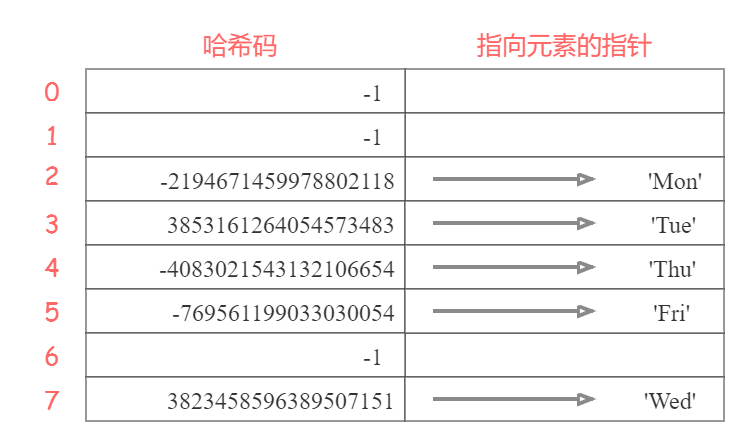


每个桶有两个字段：哈希码(hash code)和指向元素值的指针。空桶的哈希码为-1，顺序看起来是随机的。

因为存储桶的大小是固定的，所以对单个桶的访问是通过偏移量完成的。

## 哈希码和相等性

内置的 `hash()` 方法可以用于所有的内置类型对象。如果是自定义对象调用`hash()` 的话，实际上运行的是自定义的 `__hash__`。
如果两个对象在比较的时候是相等的，那它们的哈希码必须相等，否则哈希表就不能正常运行了。例如，如果 `1 == 1.0` 为真，那么`hash(1) == hash(1.0)` 也必须为真，但其实这两个数字（整型和浮点）的内部结构是完全不一样的。

为了让哈希码能够胜任哈希表索引这一角色，它们必须在索引空间中尽量分散开来。这意味着在最理想的状况下，越是相似但不相等
的对象，它们哈希码的差别应该越大。下面是一段代码输出，这段代码被用来比较哈希码的二进制表达的不同。
注意其中 `1`和 `1.0` 的哈希码是相同的，而 `1.0001`、`1.0002` 和 `1.0003` 的哈希码则非常不同。

```
32-bit Python build
1        00000000000000000000000000000001
                                          != 0
1.0      00000000000000000000000000000001
------------------------------------------------
1.0      00000000000000000000000000000001
           ! !!! ! !! ! !    ! ! !! !!!   != 16
1.0001   00101110101101010000101011011101
------------------------------------------------
1.0001   00101110101101010000101011011101
          !!!  !!!! !!!!!   !!!!! !!  !   != 20
1.0002   01011101011010100001010110111001
------------------------------------------------
1.0002   01011101011010100001010110111001
          ! !   ! !!! ! !  !! ! !  ! !!!! != 17
1.0003   00001100000111110010000010010110
------------------------------------------------
```

## 哈希冲突

在64位的CPython中，一个哈希码是一个64位的数字，即有$2^{64}$可能值，它超过$10^{19}$。但是大多数 Python 类型可以表示更多不同的值。例如，一个由10个可打印字符组成的字符串有$100^{10}$个可能的值——超过$2^{66}$个。因此，对象的哈希码的信息通常少于实际对象值。这意味着不同的对象可能具有相同的哈希码。

当不同的对象具有相同的哈希码，被称为哈希冲突。

## 哈希表算法

我们首先关注集合的内部实现，后面再探讨字典。


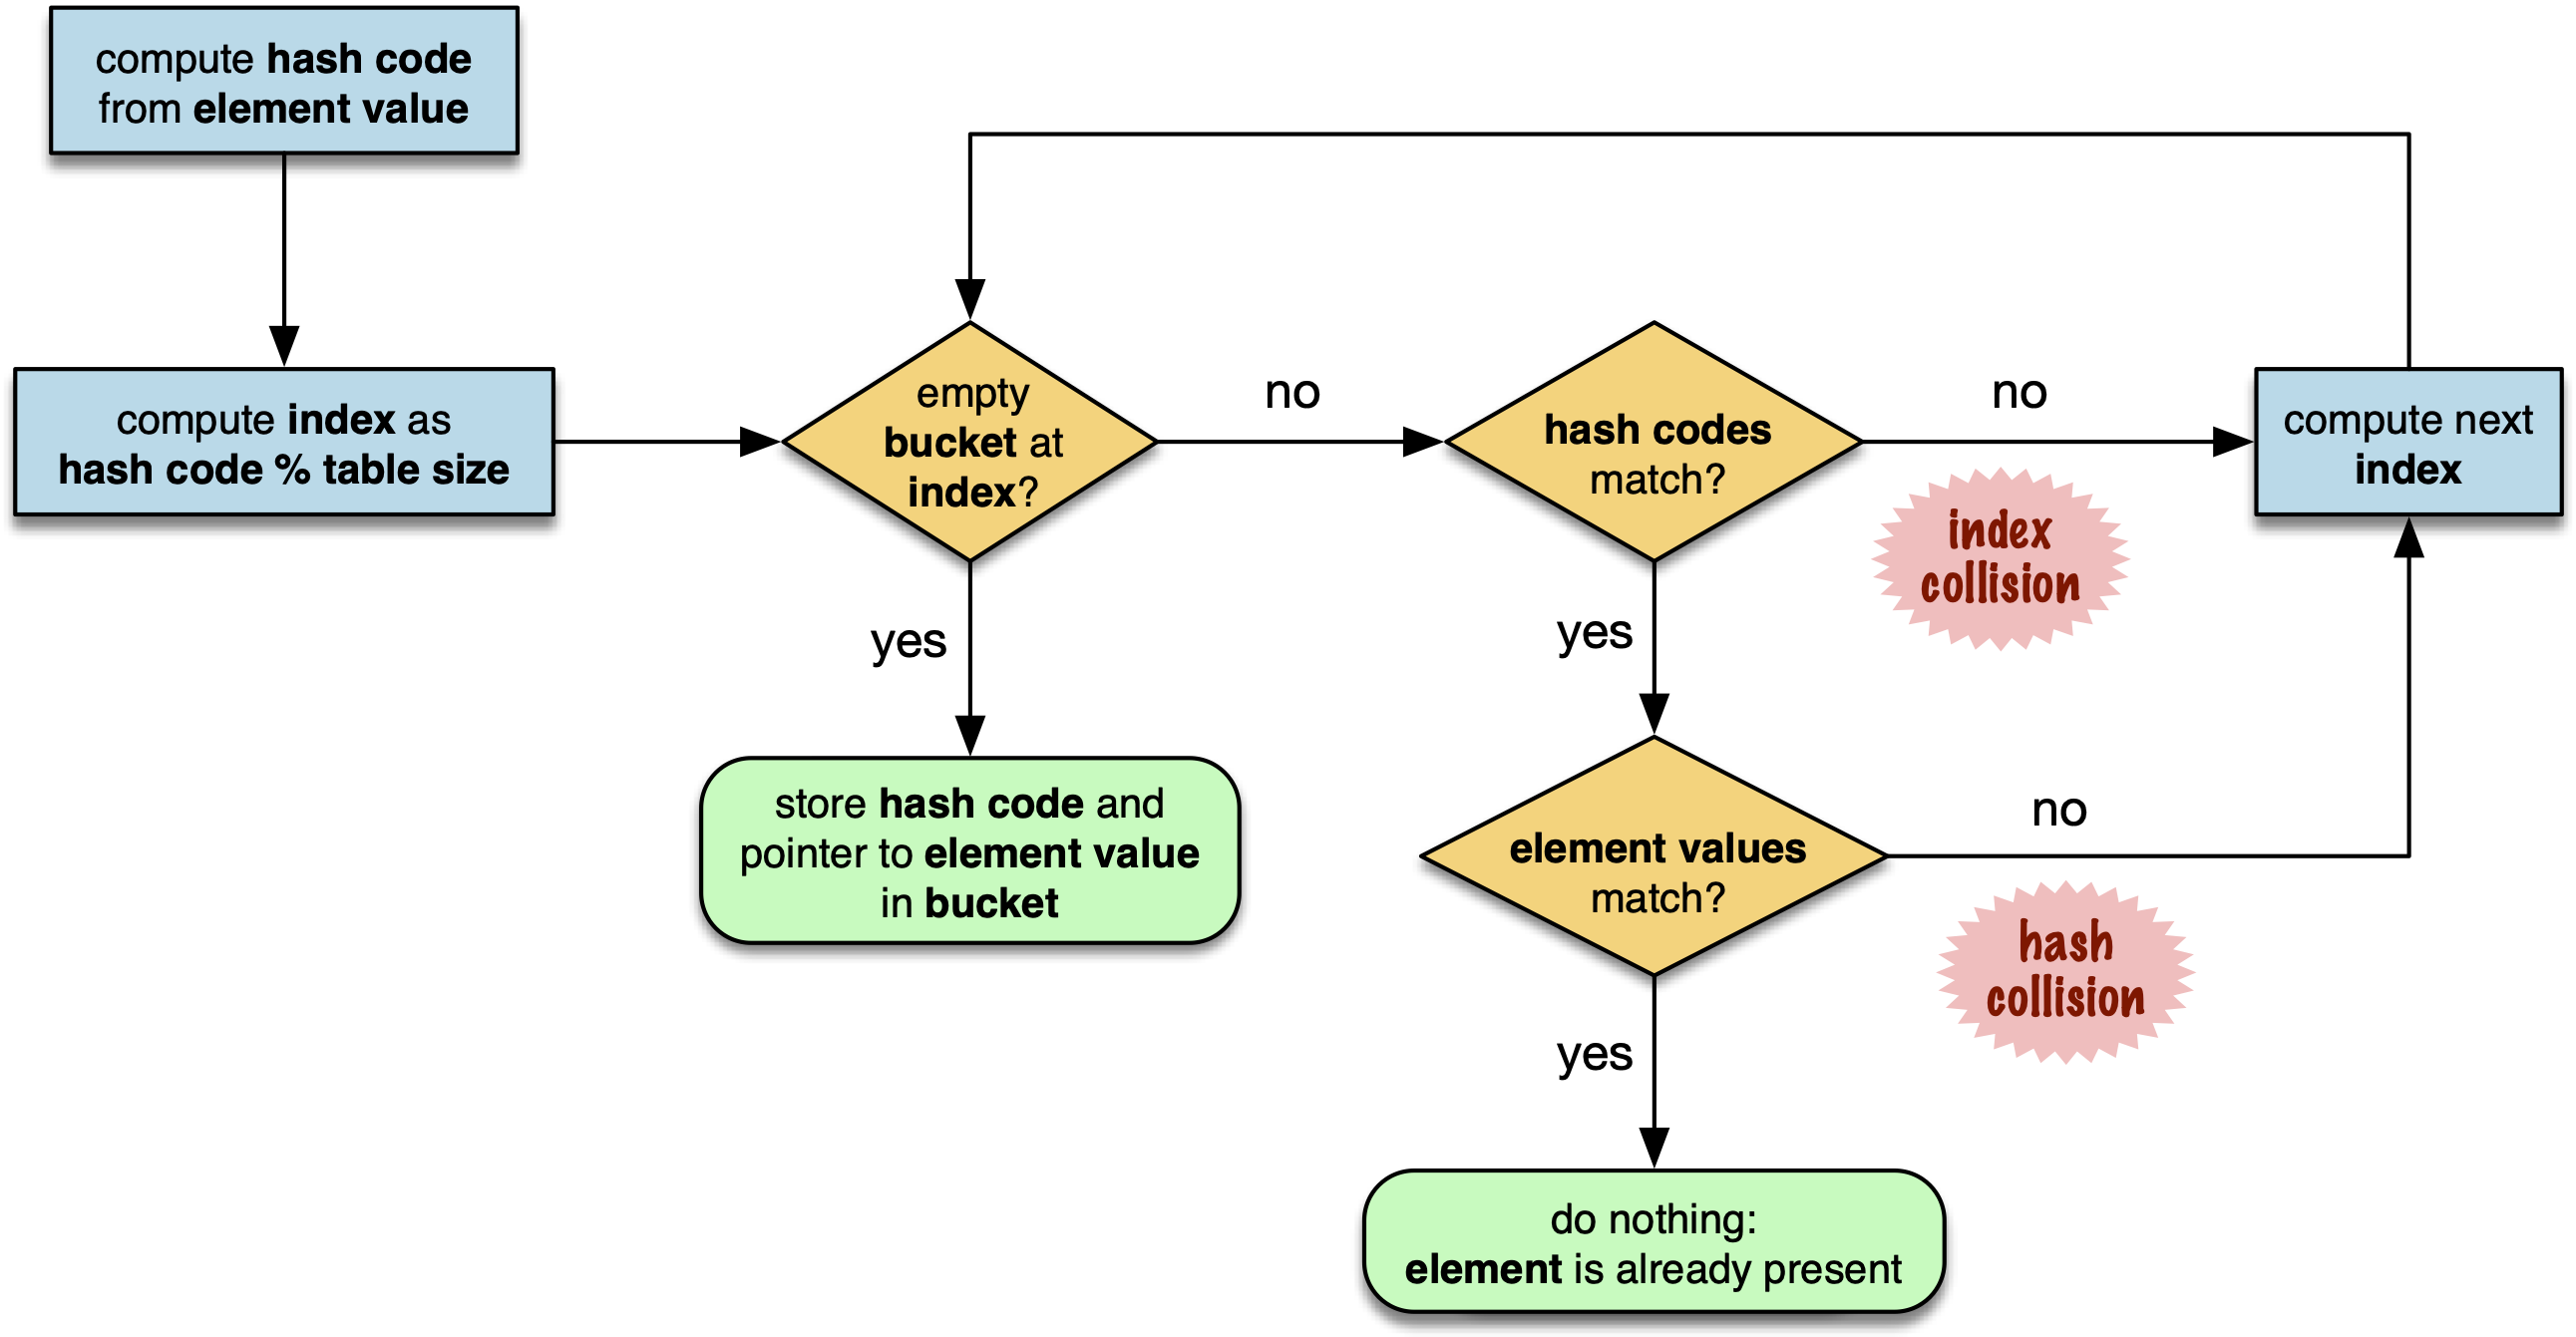

我们一步步看Python是如何构建集合`{'Mon', 'Tue', 'Wed', 'Thu', 'Fri'}`的。该算法通过上面的流程图展示。

Step 0:实例化哈希表

正如前面提到的，一个集合的哈希表从8个空桶开始。在添加元素时，Python 会确保至少有$\frac{1}{3}$个桶是空的，在需要更多空间时将哈希表的大小增加一倍。每个 bucket 的哈希码字段用`-1`初始化，这意味着“没有哈希码”。

Step 1:计算元素的哈希码

给定文本`{'Mon', 'Tue', 'Wed', 'Thu', 'Fri'}` ，Python 获得第一个元素`'Mon'`的哈希码。例如，这里有一个实际的 `'Mon'` 的哈希码，你可能会得到一个不同的结果，因为 Python 加随机盐来计算字符串的哈希码:

In [1]:
hash('Mon')

-2194671459978802118

Step 2:用哈希码计算的索引来探测哈希表

计算哈希码对哈希表大小取模的结果，作为索引。这里表大小为8，结果为：

In [2]:
hash('Mon') % 8

2

探测包括从哈希码计算索引，然后查看哈希表中相应的桶。在这种情况下，Python 查看位于偏移量2的 bucket，然后在哈希码字段找到值`-1`，说明这是一个空桶。

Step 3:将元素放到空桶内

Python存储新元素的哈希吗,-2194671459978802118,偏移量为2的bucket中，还存储一个指向字符串对象`'Mon'`的指针到元素字段。下图显示了当前的哈希表状态。

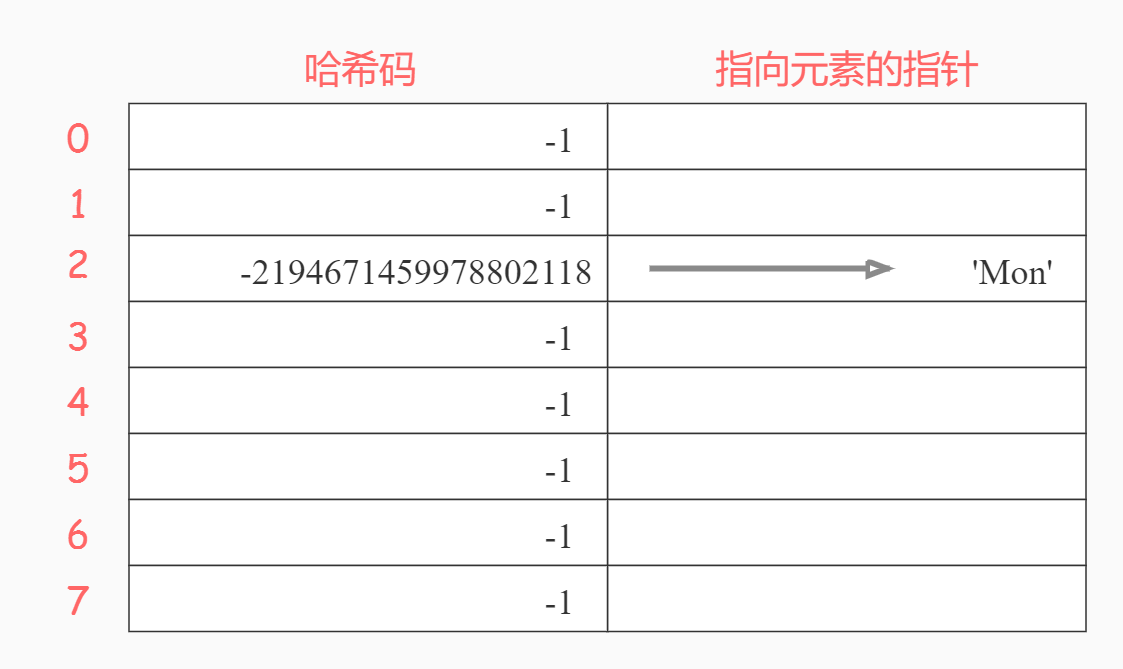

对于待插入集合内第二个元素，重复Step1,2,3。`'Tue'`的哈希码为3853161264054573483，索引为3。


In [3]:
hash('Tue') 

3853161264054573483

In [4]:
hash('Tue') % 8

3

位于哈希表中索引3的桶依旧是空桶，放入其中，现在哈希表如下：

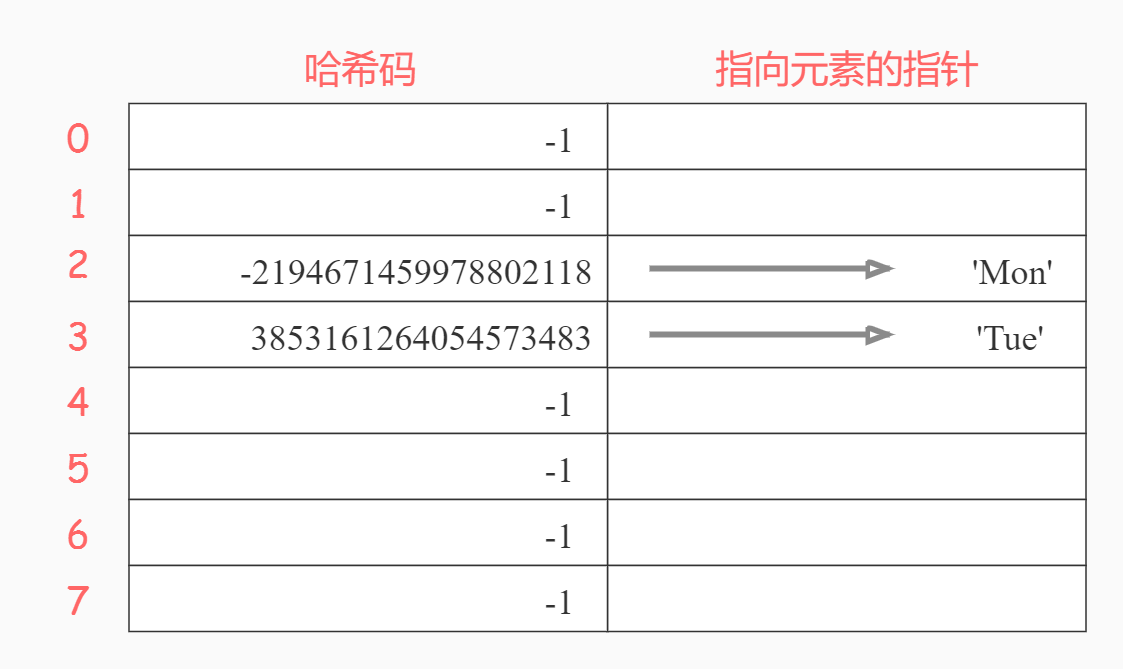



In [5]:
hash('Wed') 

3823458596389507151

In [6]:
hash('Wed')  % 8

7

继续插入'Wed'，位于索引7，依旧是空桶。
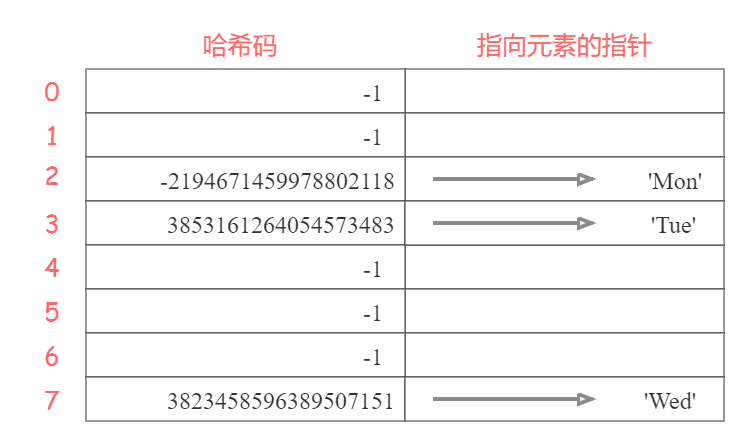

In [7]:
hash('Thu')

-4083021543132106654

In [8]:
hash('Thu') % 8

2

## 处理冲突

当添加`'Thu'`到集合中，Python计算得哈希码为-4083021543132106654 索引为2。Python检测索引2的桶，发现已经被用了。但是存储在该桶中的哈希码不同。这是索引冲突。Python然后探测下一个空桶。所以`'Thu'`最终放入索引4，如下：

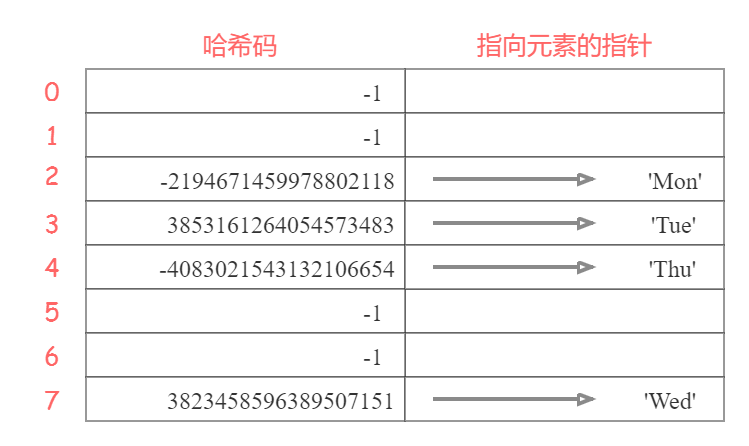



In [9]:
hash('Fri')

-769561199033030054

In [10]:
hash('Fri') % 8

2

添加最后一个元素`'Fri'`，它的哈希码为-769561199033030054，索引为2，它已经被`'Mon'`占用了。下面的索引3,4都被占用了，最终放入索引为5的位置：

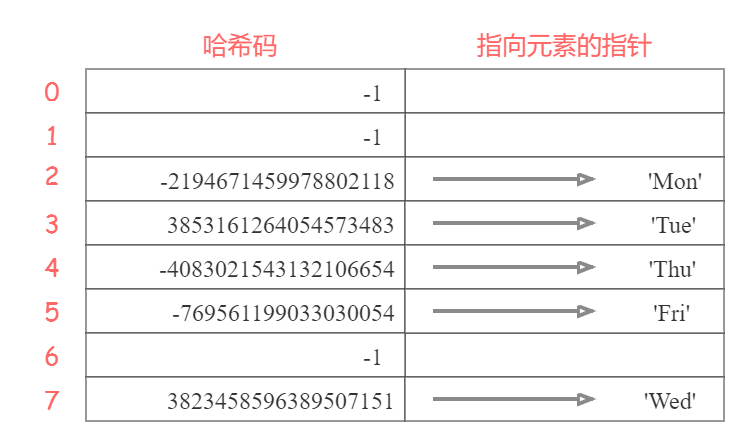

最终哈希表的状态如上图所示。
这种在索引冲突后，增加索引值的方法叫做线性寻址法。